In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
FILENAME = "train_series.csv"
# FILENAME = "test_series.csv"
# Demonstration of the baseline on train series. 
#Once the test set will be available, you just have to rename FILENAME to correspond to the test returns csv file.

In [37]:
returns = pd.read_csv(f'../inputs/{FILENAME}', index_col=0)
returns.head()

,Index Name,Index - 9,Index - 8,Index - 7,Index - 6,Index - 5,Index - 4,Index - 3,Index - 2,Index - 1,Index - 0,index ecb,index fed,Index + 1
0,V2X Index,0.001045,0.005841,0.003832,-0.027519,-0.103565,-0.045086,-0.011265,0.005164,0.054050,0.015779,"1126,1471",96,0.010597
1,MOVE Index,-0.021497,0.007891,-0.013175,-0.008436,0.000000,0.026303,0.000556,0.001455,0.007422,0.000000,975,568,0.014492
2,SPX Index,-0.001872,-0.008154,0.023588,0.004086,0.003493,0.003300,0.000885,-0.011304,0.005040,0.000156,"78,806","328,695",0.016263
3,SPX Index,0.004980,-0.000864,0.001677,0.000000,0.006030,-0.001083,0.000419,0.001492,0.001018,-0.002582,"560,1405",118,0.013581
4,EURUSD Curncy,0.000360,-0.001893,0.005579,-0.003056,-0.001171,-0.001623,-0.002350,-0.006444,-0.000729,-0.000365,404,261,0.005092


In [38]:
returns.dtypes

Index Name     object
Index - 9     float64
Index - 8     float64
Index - 7     float64
Index - 6     float64
Index - 5     float64
Index - 4     float64
Index - 3     float64
Index - 2     float64
Index - 1     float64
Index - 0     float64
index ecb      object
index fed      object
Index + 1     float64
dtype: object

In [8]:
returns.drop("Index Name", axis=1, inplace=True)
returns.drop("index ecb", axis=1, inplace=True)
returns.drop("index fed", axis=1, inplace=True)
returns.drop("Index + 1", axis=1, inplace=True)
returns

,Index - 9,Index - 8,Index - 7,Index - 6,Index - 5,Index - 4,Index - 3,Index - 2,Index - 1,Index - 0
0,0.001045,0.005841,0.003832,-0.027519,-0.103565,-0.045086,-0.011265,0.005164,0.054050,0.015779
1,-0.021497,0.007891,-0.013175,-0.008436,0.000000,0.026303,0.000556,0.001455,0.007422,0.000000
2,-0.001872,-0.008154,0.023588,0.004086,0.003493,0.003300,0.000885,-0.011304,0.005040,0.000156
3,0.004980,-0.000864,0.001677,0.000000,0.006030,-0.001083,0.000419,0.001492,0.001018,-0.002582
4,0.000360,-0.001893,0.005579,-0.003056,-0.001171,-0.001623,-0.002350,-0.006444,-0.000729,-0.000365
...,...,...,...,...,...,...,...,...,...,...
8941,-0.002045,-0.003642,0.008096,0.004949,-0.001264,0.000150,0.002482,0.000000,-0.000786,-0.002723
8942,-0.027361,0.094386,0.002350,-0.005076,0.022555,0.000963,-0.060170,0.028323,0.006516,-0.000338
8943,-0.008359,0.021658,-0.015986,-0.023528,0.020072,0.017822,0.005648,0.017045,0.008557,-0.003072
8944,0.011945,0.002567,0.000000,0.005115,0.000364,0.003999,0.012978,0.012458,-0.006032,0.005088


<AxesSubplot:>

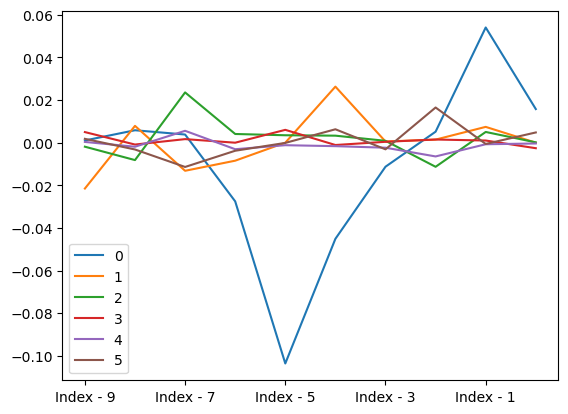

In [16]:
t_returns = returns.transpose()
t_returns.loc[:,0:5].plot()


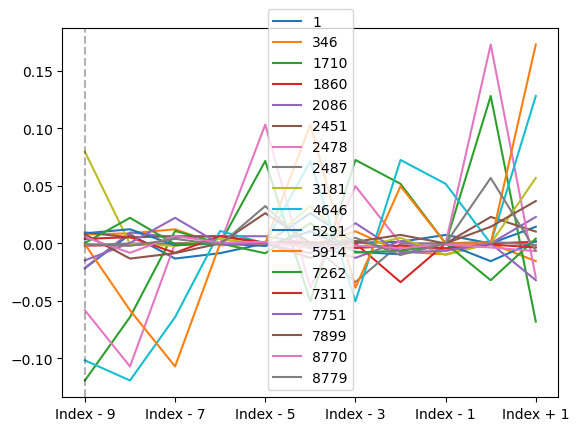

In [57]:
returns = pd.read_csv(f'../inputs/{FILENAME}', index_col=0)

ecb975 = returns[returns['index ecb'] == '975'].copy()

ecb975.drop("Index Name", axis=1, inplace=True)
ecb975.drop("index ecb", axis=1, inplace=True)
ecb975.drop("index fed", axis=1, inplace=True)
ecb975

t_ecb975 = ecb975.transpose()
t_ecb975.plot()

# plt.plot(t_ecb975.index, t_ecb975, "k", 
#          color = t_ecb975)
plt.axvline(x='Index - 0', c="black", alpha=0.3, ls='--')


In [5]:
res = pd.DataFrame()
prediction = returns.ewm(axis=1, span=9).mean()["Index - 0"]
res["regression"] = prediction
res["classification"] = (prediction > 0).astype(int)

In [6]:
res.to_csv("res_baseline.csv")